# Division of Labour: Specialization vs Autarky

### 1. Introduction and Problem Statement

A central question in economics concerns the conditions under which societies transition from self-sufficiency (autarky) to division of labor and trade. Autarky provides security and independence, but is often inefficient. Specialization, on the other hand, increases productivity by allowing agents to focus on a narrower set of tasks. However, specialization also requires reliable trade and coordination; without these, specialists may be left worse off than autarkists.

This study develops a simple evolutionary model to capture the share of market between autarkists and specializied indivviduals. We consider a population of agents who, at each stage, decide whether to:
* **Remain autarkic (A)**, producing all goods themselves, or
* **Specialize and trade (S)**, relying on others for complementary goods.

Each interaction is modeled as a **single-shot game**, and the population share of specialists evolves over time according to evolutionary dynamics. The central question is:

> *Under what conditions does specialization become a stable outcome in the economy, and when does autarky persist as the dominant strategy?*

The objectives of this study are as follows:

1. **Simulate** the evolutionary dynamics of specialization vs autarky under varying parameters.  
2. **Identify threshold effects**, i.e., the critical mass (fraction of population) of specialists required for specialization to dominate.    
3. **Explore the effect of frictions** $(\tau)$ on the critical share of Specialization.

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_dynamics(xs, gs):
    time = range(len(xs))

    # Plot population shares of specialists and autarkists
    plt.figure(figsize=(8,5))
    plt.plot(time, xs, label="Specialists (x_t)", lw=2)
    plt.plot(time, [1-x for x in xs], label="Autarkists (1-x_t)", lw=2)
    plt.xlabel("Time (t)")
    plt.ylabel("Population share")
    plt.title("Evolution of Specialists vs Autarkists")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot growth rates of specialists
    plt.figure(figsize=(8,5))
    plt.plot(range(len(gs)), gs, label="Growth rate g_t", lw=2, color="purple")
    plt.axhline(0, ls="--", color="black", alpha=0.7)
    plt.xlabel("Time (t)")
    plt.ylabel("Growth rate g_t")
    plt.title("Growth Rate of Specialists")
    plt.legend()
    plt.grid(True)
    plt.show()

### 2. Model Parameters

The model is defined by the following parameters, each of which captures a real-world aspect of economic exchange:

- **$\alpha$ (Autarky payoff):** Productivity when agents produce all goods independently.  
  *Example: A subsistence farmer producing food solely for their household.*

- **$\beta$ (Specialization productivity):** Productivity when agents fully specialize, before accounting for trade frictions.  
  *Example: A factory worker focusing on one stage of production.*

- **$\tau$ (Trade friction):** The proportion of specialized output lost due to costs of trade such as transportation, bureaucracy, or corruption.  
  *Example: Goods spoiling during transport or losses due to tariffs.*

- **$p$ (Trade reliability):** The probability that trade succeeds when two specialists interact.  
  *Example: Contracts being honored, deliveries arriving on time, or secure digital payment systems.*

- **$f$ (Fallback payoff):** The payoff a specialist receives if trade fails or if matched with an autarkist.  
  *Example: A farmer who grows a small subsistence crop alongside a cash crop, or government-provided food rations as a safety net.*

- **$x_t$ (Share of specialists):** The fraction of agents in the population who choose specialization at time \(t\).  

- **$g_t = \frac{x_{t+1}-x_t}{x_t}$ (Growth rate of specialization):** The relative speed at which the share of specialists grows or shrinks over time.

- **$T$ (Total Number of Time Steps):** The total number of Time steps for which the simulation will run.


In [259]:
# Parameters to play with

alpha = 1      # Autarky payoff
beta = 1.6     # Specialization productivity
tau = 0        # Trade friction
p = 1          # Trade reliability (In this study we have taken this to be 1, means the trade will always suceed)
f = 0.6        # Fallback payoff
T = 50         # Number of time steps
xt = 0.45      # Initial share of specialists

### 3. Payoff Structure of the Game

Each period, agents are randomly matched to play the game. Their payoffs depend on their own choice and their opponent’s choice. The payoff matrix is as follows:

|P1\P2|S|A|
|:---|:---:|:---:|
|**S**|$\pi_{SS},\pi_{SS}$|$f,\alpha$|
|**A**|$\alpha,f$|$\alpha,\alpha$|

Where:  
* $\pi_{SS} = p \cdot \beta(1-\tau) + (1-p)\cdot f$ is the expected payoff to a specialist when matched with another specialist.  
* $f$ is the fallback payoff to a specialist when matched with an autarkist or when trade fails.  
* $\alpha$ is the payoff to an autarkist, regardless of the opponent’s type.


In [260]:
pi_ss = (p * beta * (1 - tau)) + (f *(1 - p))  # Expected payoff for specialist matched with specialist

### 4. Expected Payoffs

Given a specialist share of $x_t$, the expected payoffs are:

- For a specialist:
$\pi_S(x_t) = x_t \cdot \pi_{SS} + (1-x_t) \cdot f$

- For an autarkist:
$\pi_A(x_t) = \alpha$

Thus, the relative advantage of specialization depends both on **population composition** ($x_t$) and on **environmental parameters** ($p,\tau,\alpha,\beta,f$).


### 5. Evolutionary Dynamics

We use the **replicator dynamic** to model how strategies evolve over time. The normalized form is:

$x_{t+1} = \frac{x_t \cdot \pi_S(x_t)}{x_t \cdot \pi_S(x_t) + (1-x_t)\cdot \pi_A(x_t)}$

- If $\pi_S(x_t) > \pi_A(x_t)$, the share of specialists increases.  
- If $\pi_S(x_t) < \pi_A(x_t)$, the share of specialists declines.  
- If $\pi_S(x_t) = \pi_A(x_t)$, the composition remains stable.  

This dynamic captures the idea that strategies yielding higher payoffs spread through imitation or reproduction.


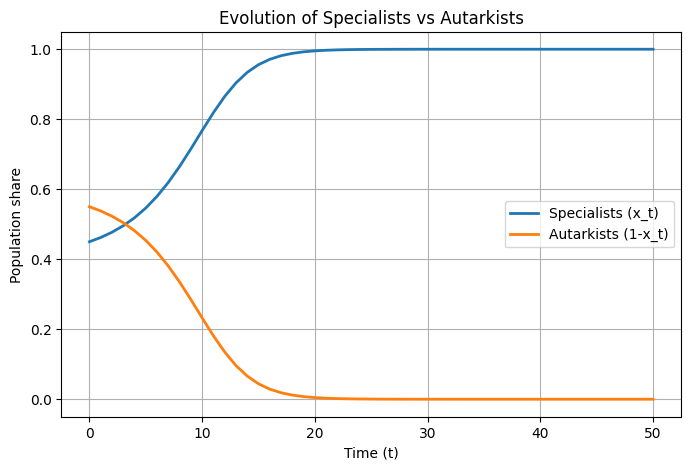

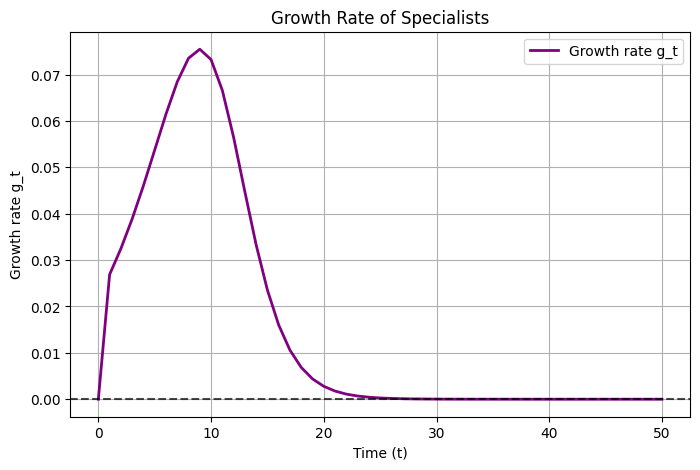

In [261]:
gt = 0                                      # Initial growth rate
X = [xt]                                    # List to store specialist shares over time
G = [gt]                                    # List to store growth rates over time
pi_a = alpha                                # Autarkist payoff
x_critical = (alpha - f) / (pi_ss - f)      # Threshold share for specialists

# Evolutionary dynamics loop
for t in range(T):
    pi_s = xt * pi_ss + (1 - xt) * f         # Expected payoff for specialist
    pi_avg = xt * pi_s + (1 - xt) * pi_a     # Average population payoff
    xt = xt * (pi_s / pi_avg)                # Update specialist share
    gt = (xt - X[-1]) / X[-1]                # Compute growth rate
    X.append(xt)                             # Store specialist share
    G.append(gt)                             # Store growth rate

plot_dynamics(X,G)  # Plot results

### 6. Objectives of the Study

The objectives of this study are as follows:

1. **Simulate** the evolutionary dynamics of specialization vs autarky under varying parameters.  
2. **Identify threshold effects**, i.e., the critical mass of specialists required for specialization to dominate.    
3. **Explore the effect of frictions** $(\tau)$ on long-run outcomes.  


### 7. Threshold Dynamics

From the replicator dynamic, the population share of specialists evolves according to:

$x_{t+1} = \frac{x_t \cdot \pi_S(x_t)}{x_t \cdot \pi_S(x_t) + (1-x_t)\cdot \pi_A(x_t)}$

The fixed points of this process are:

- $x=0$: all autarkists.  
- $x=1$: all specialists.  
- An internal threshold $x^*$, given by:
$x^* = \frac{\alpha - f}{\pi_{SS} - f},$ provided that $(f < \alpha < \pi_{SS})$.

**Interpretation:**
- If the initial share $x_0 > x^*$, the specialist share increases over time and the economy converges to $x=1$.  
- If the initial share $x_0 < x^*$, the specialist share decreases over time and the economy converges to $x=0$.  
- At exactly $x^*$, the system is unstable.

Thus, the model captures a *coordination threshold*: specialization only emerges if a sufficient mass of agents initially adopt it, or if institutions shift the payoff parameters to lower $x^*$.


### 8. Variation of Trade Friction ($\tau$) and Critical Threshold

Trade frictions $(\tau)$ reduce the effective payoff of specialization, since specialists lose a fraction of their productive advantage when trading.

The expected payoff from two specialists interacting is:
$\pi_{SS}(\tau) = p \cdot \beta (1-\tau) + (1-p)\cdot f$

The critical threshold is:
$x^*(\tau) = \frac{\alpha - f}{\pi_{SS}(\tau) - f}$

- For low $\tau$, specialization is efficient and $x^*$ is small, meaning specialization can spread easily.  
- As $\tau$ increases, $\pi_{SS}$ decreases, so the threshold $x^*$ increases.  
- At a certain value $\tau = \tau_{crit}$, the threshold reaches 1, which means:    $x^*(\tau_{crit}) = 1$

This means specialization cannot take over the economy regardless of initial conditions. Beyond this point, autarky is the only stable outcome.

#### Edge Cases of $x^*$

1. **Case 1: $\alpha > \pi_{SS}$**  
   - Then the numerator $(\alpha - f)$ is positive, but the denominator $(\pi_{SS} - f)$ is smaller than $(\alpha - f)$.  
   - This yields $x^* > 1$.  
   - Interpretation: even if the whole population specializes, autarky still gives a higher payoff. Specialization cannot emerge.

2. **Case 2: $f > \alpha$**  
   - Then the numerator $(\alpha - f)$ becomes negative, while the denominator is positive.  
   - This yields $x^* < 0$.  
   - Interpretation: specialization strictly dominates autarky from the start. Even a single specialist has no disadvantage, so the population converges to full specialization ($x=1$).

Thus, the economically meaningful case is when:
$f < \alpha < \pi_{SS}$
which ensures that the threshold $x^*$ lies strictly between 0 and 1.



The value of tau for which x_critical will reach nearly 1 is:  0.375


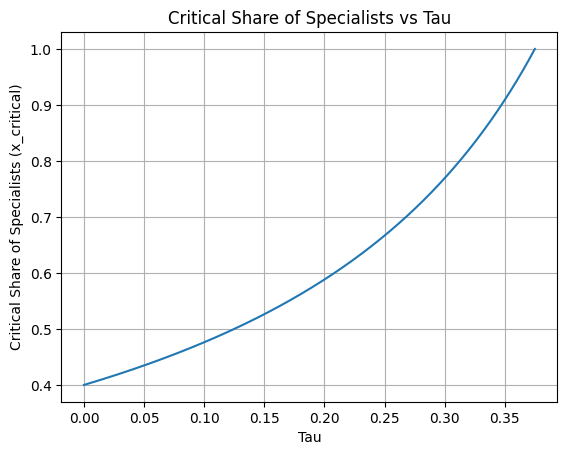

In [262]:
tau = [k/1000 for k in range(0,1001)]  # Range of tau values
X_crit = []      # List for critical specialist shares
Tau_valid = []   # List for valid tau values

# Calculate critical share for each tau
for t in tau:
    pi_ss = (p * beta * (1 - t)) + (f *(1 - p))
    x_critical = (alpha - f) / (pi_ss - f)
    if 0 <= x_critical <= 1:
        X_crit.append(x_critical)
        Tau_valid.append(t)

print("The value of tau for which x_critical will reach nearly 1 is: ",Tau_valid[-1])
plt.plot(Tau_valid, X_crit)
plt.xlabel("Tau")
plt.ylabel("Critical Share of Specialists (x_critical)")
plt.title("Critical Share of Specialists vs Tau")
plt.grid()

### 9. Conclusion

This study developed a simple evolutionary model to analyze the conditions under which economies transition from autarky to specialization and trade. By formalizing the payoff structure between autarkists and specialists, we showed that how the emergence of specialization depends on these factors: the gains from specialization ($\beta$) and the frictions of trade ($\tau$).

The dynamics reveal the existence of a **critical threshold** $x^*$ for the share of specialists in the population. When the initial proportion of specialists exceeds this threshold, specialization spreads and eventually dominates. Conversely, when the share falls short of this threshold, autarky becomes the stable outcome. Importantly, $x^*$ itself is determined by the relative productivity of autarky versus specialization and by the risks and costs associated with trade. 

The analysis also highlights two degenerate cases:  
- If autarky productivity ($\alpha$) exceeds the payoff from mutual specialization ($\pi_{SS}$), then $x^*>1$, and autarky strictly dominates.  
- If the fallback payoff for specialists ($f$) exceeds autarky productivity ($\alpha$), then $x^*<0$, and specialization strictly dominates.  

These results underscore that specialization does not emerge automatically from higher productivity. Instead, it requires a favorable institutional and infrastructural environment. Policies that **reduce trade frictions** (lower $\tau$), and **provide safety nets to specialists** (increase $f$) can shift the threshold downward, making specialization a viable and stable equilibrium. 

In conclusion, the model illustrates that the division of labor, of the key drivers of economic growth, depends not jsut only on technological potential but also on the institutional context in which trade occurs. Ensuring reliable markets and lowering barriers to exchange are essential conditions for specialization to flourish.